<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to the Regression with Neural Networks in TensorFlow
There are many definations for a regression problem but in pur cases, we're going to simplfy it: predicting a numerical variables based on some other cobination of variable, even shorter.....predicting a number

In [67]:
import tensorflow as tf
print(tf.__version__)

2.18.0


##Creating some data to view and fit

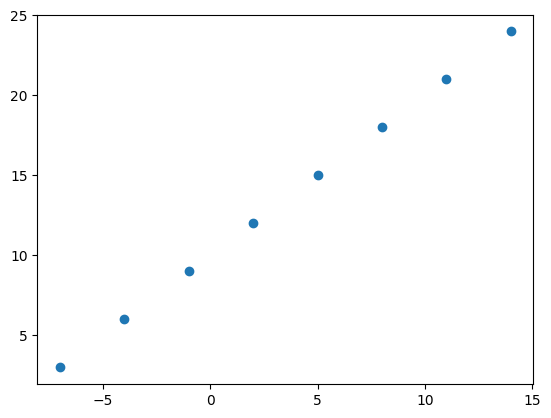

In [68]:
import numpy as np
import matplotlib.pyplot as plt
#creating features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0, 8.0, 11.0, 14.0])
#creating labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#visulaize it
plt.scatter(x,y)


In [69]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [70]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([9397000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397000], dtype=int32)>)

In [71]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [72]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [73]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

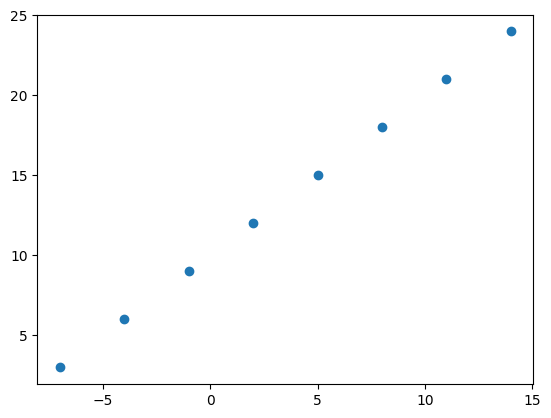

In [74]:
plt.scatter(x,y)

In [75]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##Steps in Modeling TensorFlow
1.**Creating a Model**: define the input & ouput layers, as well as the hidden layres of a deep learning model.

2.**Compiling a model**: define the loss function(in other words, the function which tells our model how wrong it is)and the optimizer( tells our model how to improve the patterns its learning) and evaluation metrics
(What we can use to interpret the performance of our model).

3.**Fitting a model**: letting the model try to find patterns between x & y(features and labels)

In [76]:
#set ramdom seed
tf.random.set_seed(42)

#1.Create  a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - loss: 10.9478 - mae: 10.9478
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.8153 - mae: 10.8153
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.6828 - mae: 10.6828
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.5503 - mae: 10.5503
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.4178 - mae: 10.4178


In [77]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[15.421192]], dtype=float32)

##Improving Model
We can inprove the model by altering the steps we took to create a mode.

1.**Creating a mode**: here we might add more layres, increaes the number of hidden unite(all called neurons) within each of the hidden layers, change the activation function of each layer

2.**Compiling a model**:Here we might change the optimizatioin function or perhaps the learning rate of optimization functon.

3**Fitting**: here we might fit the model for more epochs(leave it training for longer) or on more data(given the model more examples to learn from)

###Using SSD()

In [78]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step - loss: 13.8173 - mae: 13.8173
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.4119 - mae: 13.4119
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.0083 - mae: 13.0083
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.6179 - mae: 12.6179
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.2098 - mae: 12.2098
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.7919 - mae: 11.7919
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.3403 - mae: 11.3403
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.8346 - mae: 10.8346
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.2262 - mae: 10.2262
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.4639 - mae: 9.4639
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.5023 - mae: 8.5023
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.2749 - mae: 7.2749
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [79]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred, y_pred+10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


(array([[29.225876]], dtype=float32), array([[39.225876]], dtype=float32))

###Using Adam(Adam(learning_rate=0.0001)

In [80]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.4668 - mae: 13.4668
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.4336 - mae: 13.4336
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.4006 - mae: 13.4006
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.3675 - mae: 13.3675
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 13.3354 - mae: 13.3354
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 13.3030 - mae: 13.3030
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.2697 - mae: 13.2697
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.2355 - mae: 13.2355
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.2011 - mae: 13.2011
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.1689 - mae: 13.1689
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.1371 - mae: 13.1371
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 13.1048 - mae: 13.1048
Epoch 13/100
1/1 ━━━━━━━━━

In [81]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[32.73683]], dtype=float32)

In [82]:
y_pred+10

array([[42.73683]], dtype=float32)

In [83]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

###Let's see if we can make another to improve our model

In [84]:
#1. Create tthe model(this time eith an extra hidden layers with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 13.0227 - mae: 13.0227
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.4642 - mae: 12.4642
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.9074 - mae: 11.9074
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.3375 - mae: 11.3375
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.7468 - mae: 10.7468
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.1402 - mae: 10.1402
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.5134 - mae: 9.5134
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.8723 - mae: 8.8723
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.1950 - mae: 8.1950
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4687 - mae: 7.4687
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.6969 - mae: 6.6969
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.8644 - mae: 5.8644
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [85]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [86]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[32.51074]], dtype=float32)

###48. Evaluating a TensorFlow model part 1 ("visualise, visualise, visualise")

#Evaluating a model
In pratice, a typical workflow you'll go through when building neural networks is:
```
Build a model->fit it -> evaluate it-> tweek model -> fit it -> evaluate it -> tweek a model -> fit it -> evaluate it...



When it somes to evaluating.. there are 3 words you should memorize:
>"Visualize, visualize, visualize"

It's a good idea to visualize:

*The data- what data are we woeking with? What does it looks like?

*The model itself- what does our model look like?

*The training of a model- how does a model perform while it learning?

*The predictions of a model- how do the prediction of a model line up aagainst the ground truth(the original labels)


In [87]:
#Make a big dataset
x=tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [88]:
#make labels for the dataset
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

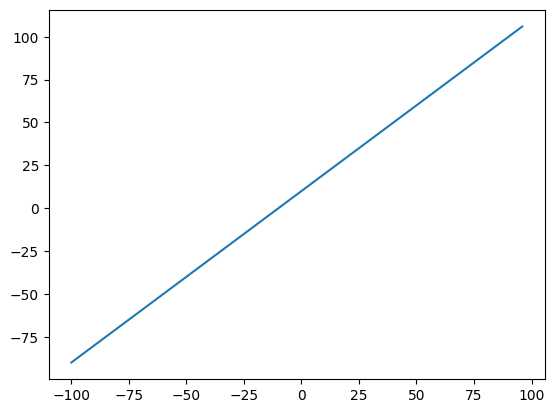

In [89]:
#visualize the data
import matplotlib.pyplot as plt
plt.plot(x,y)

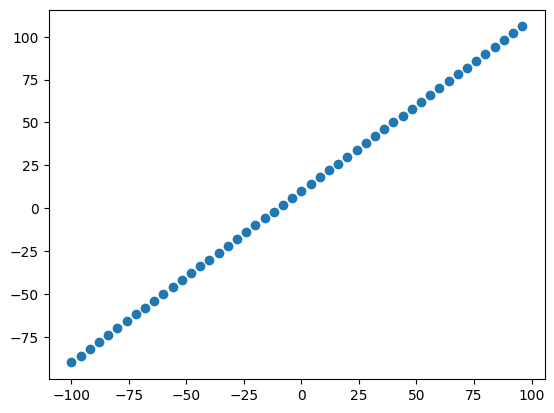

In [90]:
plt.scatter(x,y)

###The 3 set...
***Training set*** -the model learns from the  data, which is typicallly 70-80% of the total data you have available.

***Validation set*** - the model gets turned on this data, which is typically 10-15% of the data available.

***Test set*** - The model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data vailabe


In [91]:
x_train=np.array(x[:40])# first 40 are training samples(80% of the total data)
y_train=np.array(y[:40])

x_test=x[40:]# last 10 are testing samples(20% of the total data)
y_test=y[40:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#Visualising the data
Now we have got pur data in tarining and test sets... let's visulaize it again!

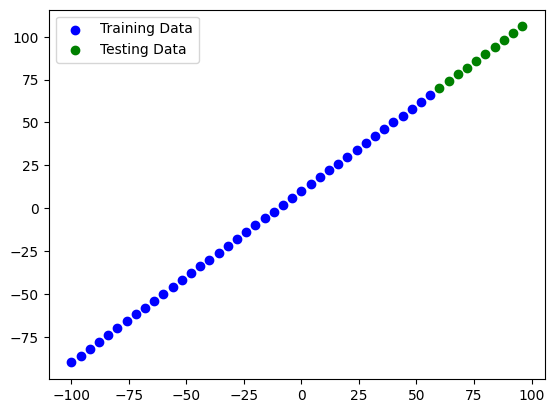

In [92]:
# plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training Data")

#plot testing data in green
plt.scatter(x_test, y_test, c="g", label="Testing Data")

#showing the legends
plt.legend();


In [93]:
#lets create a model which builds autoatically by defining the input_shape agguments

tf.random.set_seed(42)

#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"), # 1 denotes the no. of the parameter(optional you can choose multiple no. of params)
    tf.keras.layers.Dense(1, name="output_layes")
], name="mode_1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "mode_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layes (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
#3.Fit a model
model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 42.5860 - mae: 42.5860 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 32.8217 - mae: 32.8217
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23.5758 - mae: 23.5758
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19.7673 - mae: 19.7673
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 17.8732 - mae: 17.8732
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17.0971 - mae: 17.0971
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8140 - mae: 11.8140
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.5471 - mae: 14.5471
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.9935 - mae: 15.9935
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.0405 - mae: 12.0405
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.0441 - mae: 15.0441
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.1062 - mae: 11.1062
Epoch 13/100
2/2 ━━━━━━━

In [96]:
#get a summaru of a model
model.summary()

Model: "mode_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layes (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

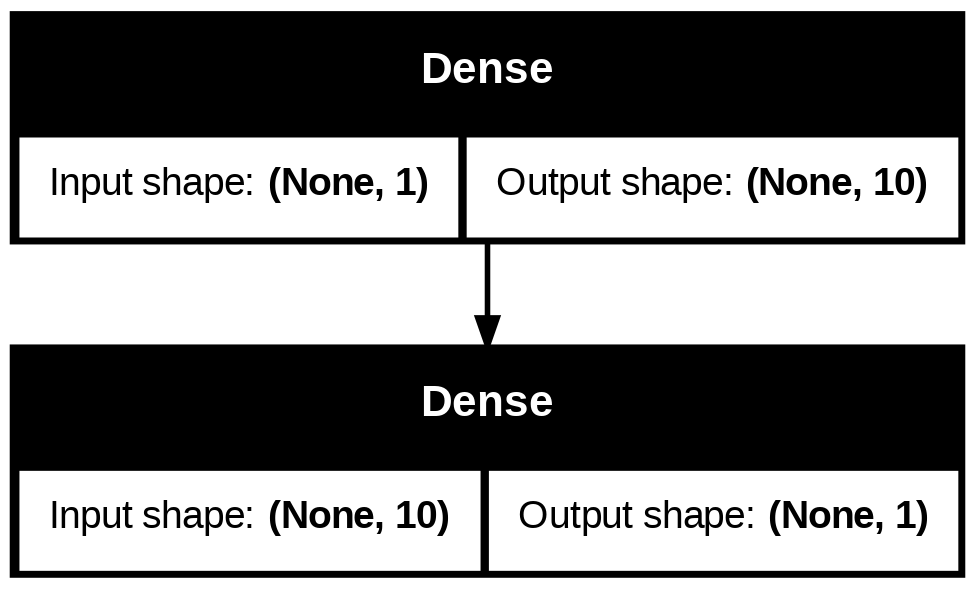

In [97]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

###Visualize our model's Predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test oy y_true versus y_pred(ground truth versus you model's predictios)

In [98]:
#3.Fit a model
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=0)

In [99]:
#Make some predictions
y_pred=model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[45.718525],
       [48.56164 ],
       [51.40476 ],
       [54.24789 ],
       [57.09101 ],
       [59.934128],
       [62.77725 ],
       [65.62038 ],
       [68.463486],
       [71.30661 ]], dtype=float32)

In [100]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [101]:
#let's create a plotting functions
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))
#plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

#plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

#plot the predictions in red
  plt.scatter(test_data,  predictions, c="r", label=" Predictions")
#dhow the legends
  plt.legend()

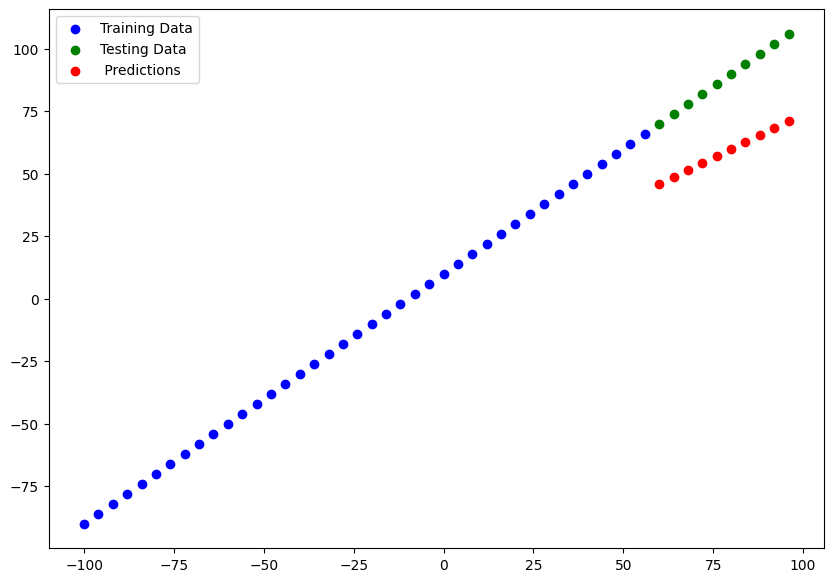

In [102]:
plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred)

###Evaluating our Model's prediction with a regreassion evaluation atrics

Depending upon the problem you are working on, there will be different evaluation metrices to evaluate your

Since we're working on a regressioin, two of the main metrices:

*MAE: mean absolute error, "on average, how wrong is each of my model's prediction"

*MSE: mean Square error, "square the average errors"

In [103]:
#Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 29.4874 - mae: 29.4874


[29.4874324798584, 29.4874324798584]

In [104]:
#calculate the mean absloute error
mae=tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.4874324798584>

In [105]:
#calculate the mean square error
mse=tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=880.5501708984375>

#Making the MSE function and MAE function



In [106]:
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true, tf.squeeze(y_pred)) #squeeze removes the 1-D

In [107]:
def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true, tf.squeeze(y_pred)) #squeeze removes the 1-D

#Condicting experiment to improve our model

(so thar red line and green line touches to each other)

```Build a model->fit it -> evaluate it-> tweek model -> fit it -> evaluate it -> tweek a model -> fit it -> evaluate it...```

1. Get more data- get ore example for your model to train on(more opportunities to learn patterns or relationship between features and labels)

2. Make your model larger(using a more complex model )- this might come in the form of more layers or more hidden units in each layers

3. Train for longer -give your model more of a chance to find the patterns between the data

Let's do 3 modelling experiments:

1. `model_1`  same as the original model, 1 layer, trained for 100 epochs

2. `model_2` -2 layers, trained for 100 epochs

3. `model_2` -2 layers, trained for 500 epochs

`Build model_1`

In [108]:
#Set the random seed
tf.random.set_seed(42)
#1. Create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3.Fit a model
model_1.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 19.9454 - mae: 19.9454 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.3127 - mae: 10.3127
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8465 - mae: 7.8465
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.8224 - mae: 10.8224 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.6487 - mae: 7.6487
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.9954 - mae: 11.9954
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.1661 - mae: 8.1661
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.8166 - mae: 8.8166
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.7743 - mae: 7.7743 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.7299 - mae: 10.7299
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.5821 - mae: 7.5821 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.9026 - mae: 11.9026 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


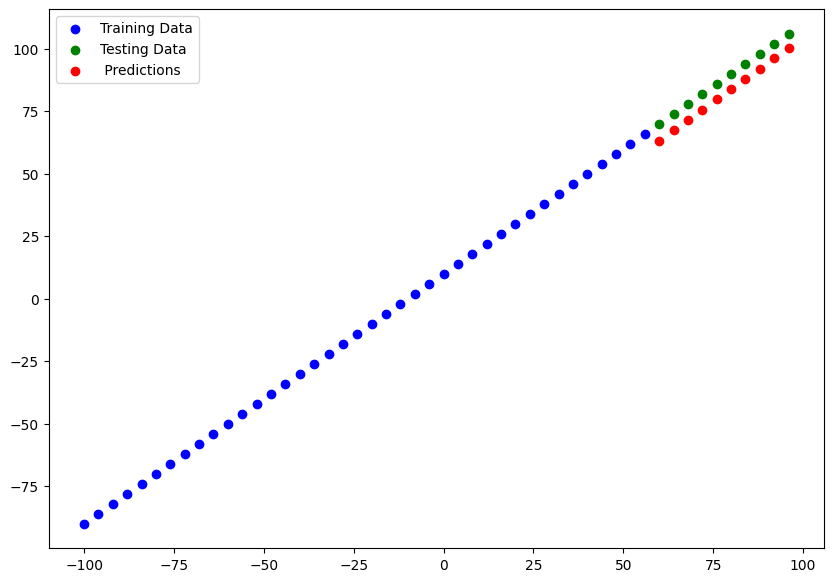

In [109]:
#make and plot predictioin for model_1
y_preds_1=model_1.predict(x_test)
y_preds_1
plot_predictions(predictions=y_preds_1)

In [110]:
tf.squeeze(y_preds_1), y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 63.242657,  67.364296,  71.48593 ,  75.60757 ,  79.7292  ,
         83.85084 ,  87.97247 ,  92.09411 ,  96.215744, 100.33738 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [111]:
mae_1=mae(y_test, tf.squeeze(y_preds_1))
mse_1=mse(y_test, tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.209980487823486>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.68592071533203>)

`Build model_2`

* 2 dense layers , trained for the 100 epochs

In [112]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_1.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.1121 - mae: 9.1121
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.8050 - mae: 10.8050
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7531 - mae: 7.7531
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.2218 - mae: 9.2218
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.9692 - mae: 10.9692
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.9141 - mae: 11.9141
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.1588 - mae: 7.1588
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8689 - mae: 7.8689 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.8668 - mae: 6.8668
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.6604 - mae: 8.6604
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6931 - mae: 6.6931
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.5751 - mae: 10.5751
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5519 - mae: 7.5519
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


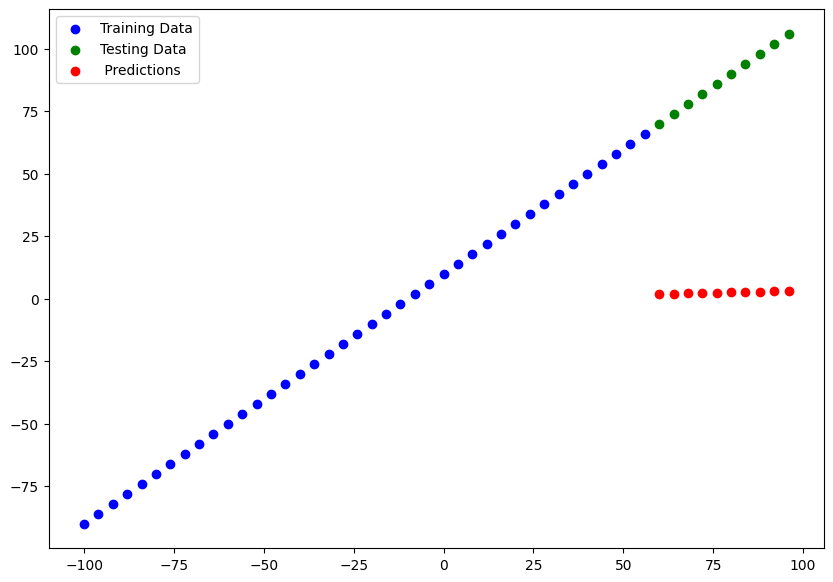

In [113]:
#make and plot predictioin for model_1
y_preds_2=model_2.predict(x_test)
# y_preds_2
plot_predictions(predictions=y_preds_2)

In [114]:
mae_2=mae(y_test, tf.squeeze(y_preds_2))
mse_2=mse(y_test, tf.squeeze(y_preds_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=85.4635238647461>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7427.56787109375>)

```Build mode_3```

In [115]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=500, verbose=1)
# model_1.fit(tf.expand(x_train, axis=1), y_train, epochs=100, verbose=1)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 32.9819 - mae: 32.9819 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.0845 - mae: 26.0845
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23.9508 - mae: 23.9508
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19.6120 - mae: 19.6120
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17.4266 - mae: 17.4266
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.3626 - mae: 16.3626
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 16.6974 - mae: 16.6974
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.7867 - mae: 11.7867
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.6983 - mae: 14.6983
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.6193 - mae: 15.6193
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.7741 - mae: 11.7741
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.7626 - mae: 14.7626
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


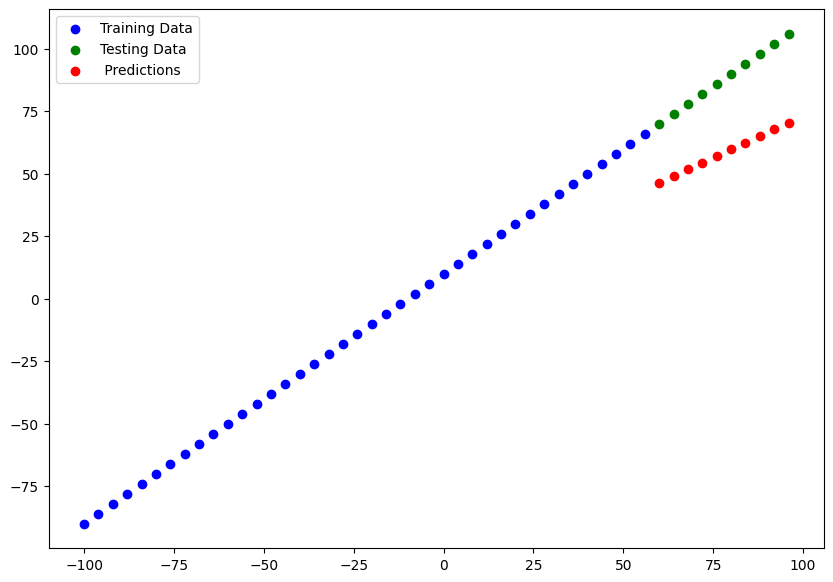

In [116]:
#make and plot predictioin for model_1
y_preds_3=model_3.predict(x_test)
# y_preds_2
plot_predictions(predictions=y_preds_3)

In [117]:
mae_3=mae(y_test, tf.squeeze(y_preds_3))
mse_3=mse(y_test, tf.squeeze(y_preds_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=29.527942657470703>,
 <tf.Tensor: shape=(), dtype=float32, numpy=886.60009765625>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


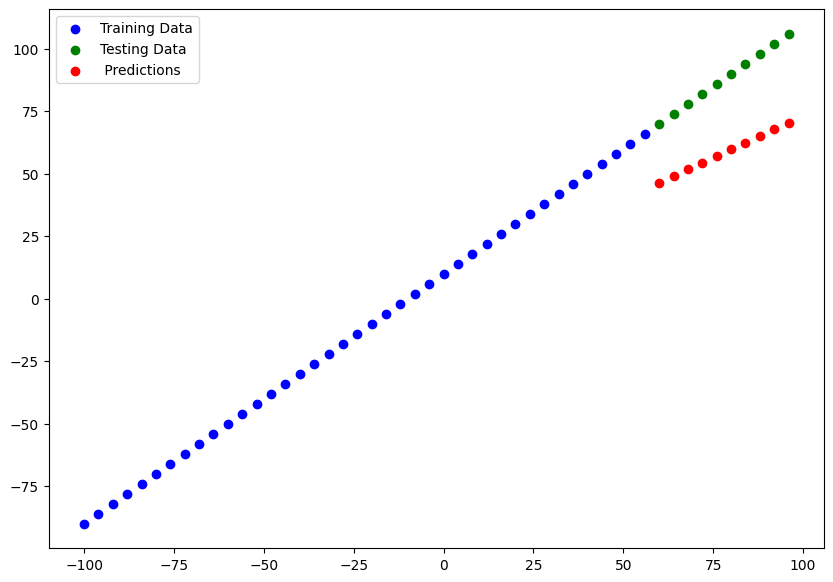

In [118]:
y_preds_3=model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [119]:
#let's create a dataframe using a pandas
import pandas as pd
model_result=[["model_1", mae_1.numpy(), mse_1.numpy()],
              ["model_2", mae_2.numpy(), mse_2.numpy()],
              ["model_3", mae_3.numpy(), mse_3.numpy()]]
total_data=pd.DataFrame(model_result, columns=["Model", "MAE", "MSE"])
total_data

,Model,MAE,MSE
0,model_1,6.209980,38.685921
1,model_2,85.463524,7427.567871
2,model_3,29.527943,886.600098


Conclusion: Model 2 performs the best

##Saving our Models
Saving our model allow us to use outside the google collab( or whereever they are trained) such as web applocatioin or on a mobile application

There are two main formats we can save oue model too:

1.The SaveModel format

2.The HDF5 format


In [120]:
#save model using The SaveModel format
import tensorflow as tf

# Assuming you have a trained model called 'model_1'
model_1.save("best_model_SavedModel_format.keras")


###Loading in a Saved Model

In [121]:
loaded_model=tf.keras.models.load_model("best_model_SavedModel_format.keras")
loaded_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)